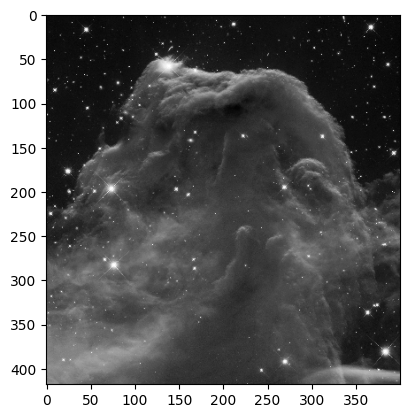

In [2]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt


def load_image_cv2(image_path: str) -> np.ndarray:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read..."
    return img


def show_image_now(image: np.ndarray, cmap="gray"):
    plt.imshow(image, cmap=cmap)
    plt.show()


def path_to_images(output_filename="images", output_dir="../") -> str:
    """
    > This function returns the path to the images directory

    :param output_filename: The name of the folder that will be created to store the images, defaults to images (optional)
    :param output_dir: The directory to save the images to, defaults to ../ (optional)
    """
    if output_filename not in os.listdir(output_dir):
        if output_dir[-1] != "/":
            output_dir += "/"
        os.mkdir(output_dir + output_filename)
    output_dir += output_filename
    return output_dir + "/"


img = load_image_cv2(path_to_images() + "nebula.png")

show_image_now(img, cmap='gray')

(256, 1)
(256,)


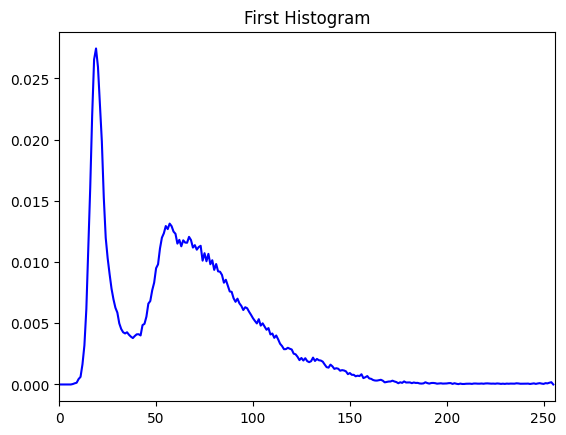

In [3]:

# create histogram using opencv
# check its shape

hist = cv2.calcHist([img], [0], None, [256], [0, 255])
print(hist.shape)
hist = np.reshape(hist, (hist.shape[0],))
hist /= img.shape[0] * img.shape[1]
print(hist.shape)
plt.plot(np.arange(0, len(hist)), hist, color='blue')
plt.xlim([0, 256])
plt.title("First Histogram")
plt.show()

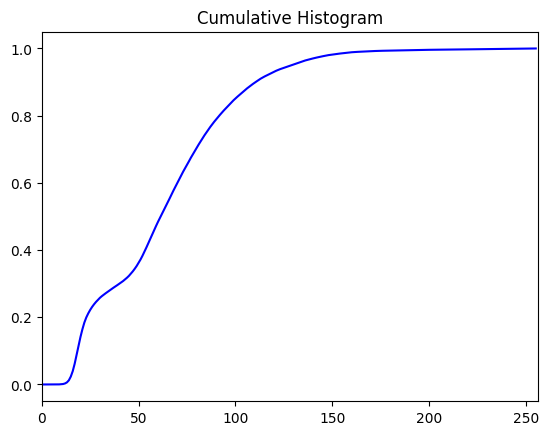

In [4]:

# prepare cumulative histogram


hist_sum = np.zeros_like(hist)

for i in range(1, len(hist)):
    hist_sum[i] = hist_sum[i - 1] + hist[i]

plt.title("Cumulative Histogram")

plt.plot(np.arange(0, len(hist_sum)), hist_sum, color='blue')

plt.xlim([0, 256])
plt.show()


In [5]:
def gauss(x, sigma, mean):
    val = 1 / (sigma * np.sqrt(2 * np.pi))
    val *= np.exp(-0.5 * ((x - mean) / sigma * (x - mean) / sigma))
    return val


0.9987352973160242


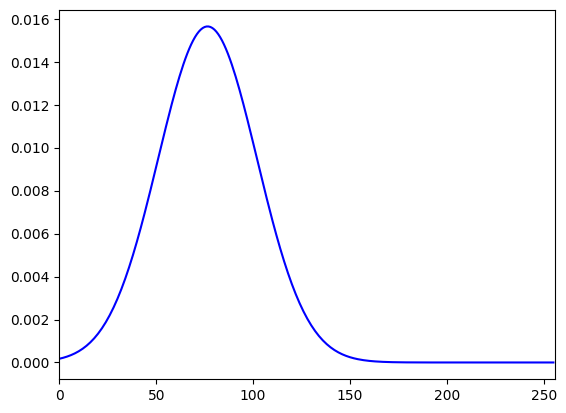

In [6]:
target_hist = np.zeros(hist.shape)
for i in range(0, 256):
    target_hist[i] = gauss(i / 255, 0.1, 0.3) / 255

print(np.sum(target_hist))
plt.plot(target_hist, color='blue')
plt.xlim([0, 256])
plt.show()

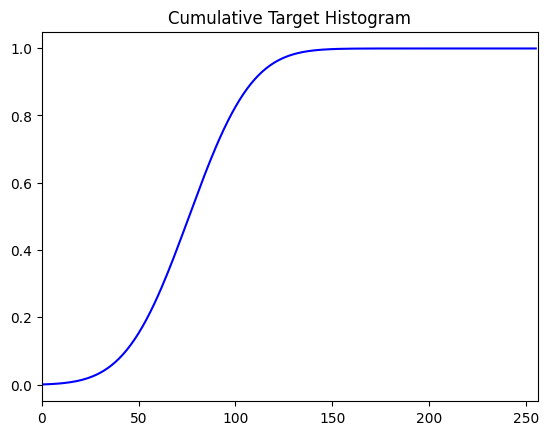

In [7]:

# cumulative target histogram

target_hist_sum = np.zeros_like(target_hist)
for i in range(len(target_hist)):
    target_hist_sum[i] = target_hist_sum[i - 1] + target_hist[i]

plt.plot(target_hist_sum, color='blue')
plt.xlim([0, 256])
plt.title("Cumulative Target Histogram")
plt.show()

In [8]:

# prepare lookup table for mapping

mapping = np.zeros(hist.shape)

target_val = 0

for i in range(len(mapping)):
    mapping[i] = np.argmax(target_hist_sum > hist_sum[i])
# editing negative burnings
mapping[np.argmax(mapping):] = 255


print(mapping[:10], mapping[-10:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]


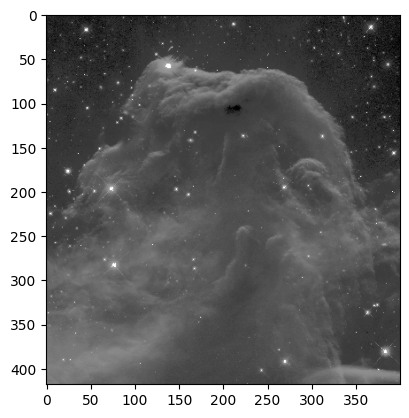

In [9]:

# remap the image


new_img = np.zeros_like(img)

# mapping by vectors (rows)
for index, i in enumerate(img):
    new_img[index] = mapping[i]

plt.imshow(new_img, cmap='gray')

(256, 1)
(256,)


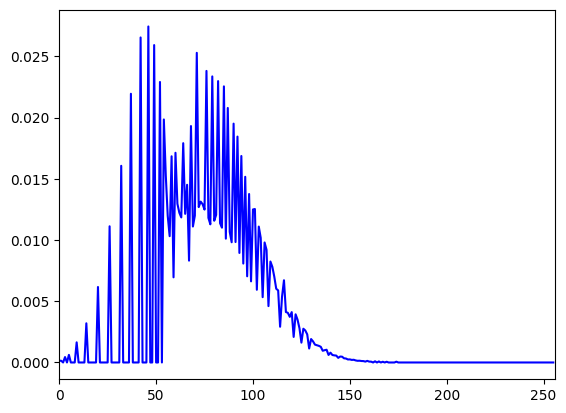

In [10]:

# check resulting histogram

hist = cv2.calcHist([new_img], [0], None, [256], [0, 255])
print(hist.shape)
hist = np.reshape(hist, (hist.shape[0],))
hist /= img.shape[0] * img.shape[1]
print(hist.shape)
plt.plot(hist, color='blue')
plt.xlim([0, 256])
plt.show()